Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MAE: 0.4432 - loss: 0.1207 - val_MAE: 0.4334 - val_loss: 0.1110
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.4338 - loss: 0.1124 - val_MAE: 0.4103 - val_loss: 0.0914
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.4274 - loss: 0.1121 - val_MAE: 0.3917 - val_loss: 0.0782
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.4047 - loss: 0.0956 - val_MAE: 0.3779 - val_loss: 0.0694
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.3866 - loss: 0.0817 - val_MAE: 0.3701 - val_loss: 0.0641
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3808 - loss: 0.0817 - val_MAE: 0.3678 - val_loss: 0.0622
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3827 - loss: 0.0814 - val_MAE: 0.3686 - val_loss: 0.0618
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3905 - loss: 0.0923 - val_MAE: 0.3651 - val_loss: 0.0600
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.3856 - loss: 

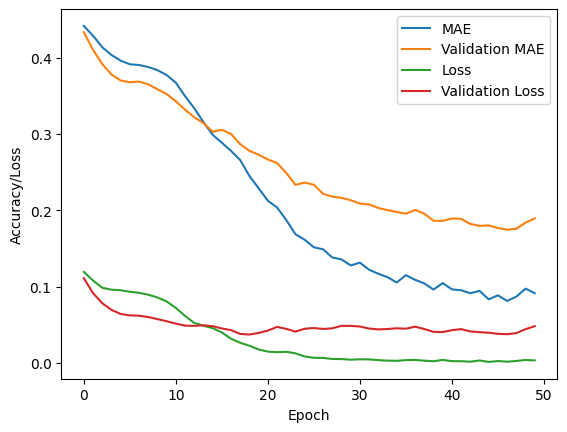

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


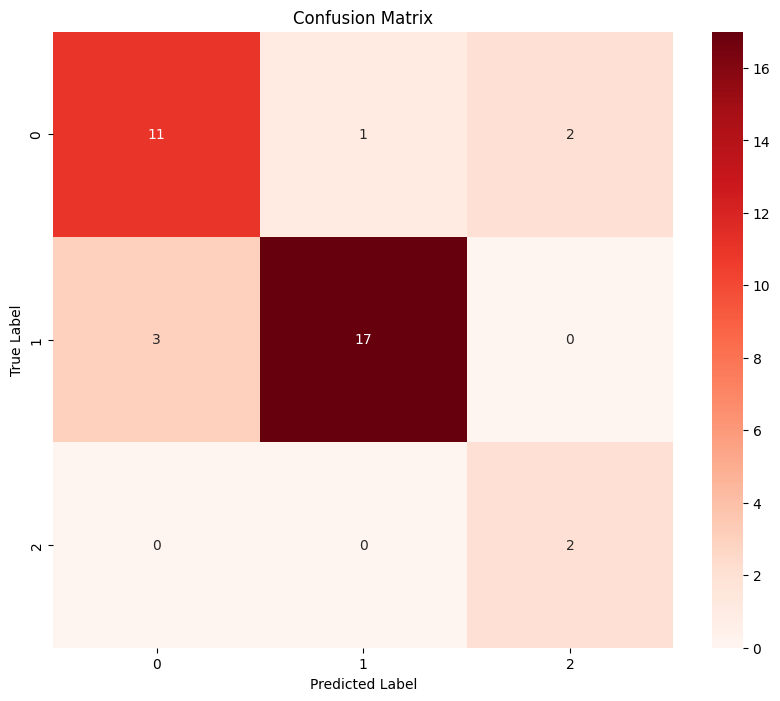

The Mean Absolute Error of this Model is 0.22
The accuracy of this model is 83.0%


In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score

# Load the dataset
df = pd.read_csv('Virtual Patient Models_Dataset1.csv')

# Handle missing values (assuming empty values are represented as NaN)
df.fillna(df.mode().iloc[0], inplace=True)

# Extract features and target variable
features = ['part_id', 
             'gender', 
             'age', 
             'low_physical_activity', 
             'bmi_score',
             'cognitive_total_score', 
             'sleep', 
             'depression_total_score', 
             'living_alone', 
             'leisure_out', 
             'leisure_club',
             'social_visits', 
             'social_calls', 
             'social_phone', 
             'social_skype', 
             'social_text', 
             'activity_regular']

x = df[features]
y = df['depression_category']

# Convert string target variables to numerical categories using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode features variables
x = pd.get_dummies(x)

# Data preprocessing: scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Number of unique classes (depression categories)
num_classes = len(label_encoder.classes_)

# Convert the target variable to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Model Architecture
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(50, activation='relu', kernel_initializer=RandomUniform()),
    Dropout(0.2), #dropout layer
    Dense(120, activation='relu', kernel_initializer=RandomUniform()),
    Dense(num_classes, activation='softmax', kernel_initializer=RandomUniform())
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.99), loss='categorical_focal_crossentropy', metrics=['MAE'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.2)

# Plot training history
plt.plot(history.history['MAE'], label='MAE')
plt.plot(history.history['val_MAE'], label='Validation MAE')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

score = mean_absolute_error(y_true_labels, y_pred_labels)
print("The Mean Absolute Error of this Model is {}".format(round(score, 2)))
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("The accuracy of this model is {}%".format(round(accuracy, 2)*100))
